<a href="https://colab.research.google.com/github/Sachinthana-Pathiranage/Sri-Ayu-Ayurvedic-Care/blob/Kavindi/Notebooks/Kavindi's%20Notebooks/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Uploading and Loading the Dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd

file_path = "Dosha_dataset.csv"
data = pd.read_csv(file_path)

print(data.info())
print(data.describe())
print(data.head())

Saving Dosha_dataset.csv to Dosha_dataset.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Columns: 135 entries, SampleIdx to class
dtypes: int64(1), object(134)
memory usage: 155.2+ KB
None
        SampleIdx
count  147.000000
mean    74.000000
std     42.579338
min      1.000000
25%     37.500000
50%     74.000000
75%    110.500000
max    147.000000
   SampleIdx Gender   bodyBuild_Size bodyFrame_Breadth bodyFrame_Length  \
0          1   Male  Weaklydeveloped       Thin/Narrow             Long   
1          2   Male    Welldeveloped             Broad             Long   
2          3   Male  Weaklydeveloped       Thin/Narrow             Long   
3          4   Male  Weaklydeveloped       Thin/Narrow             Long   
4          5   Male    Welldeveloped             Broad             Long   

  bodyHair_Color chest_Breadth   eye_Color             eye_Size  \
0          Black   Thin/Narrow   DarkBrown  Moderatelydeveloped   
1      DarkBrown         Broad   Da

In [3]:
# Data Cleaning

import pandas as pd

# Assuming `data` is already loaded as a DataFrame
print(f"Initial data shape: {data.shape}")

# 1.1 Handling Missing Values
# Drop rows and columns with all NaN values and fill missing categorical values with mode+
data_cleaned = data.fillna(data.mode().iloc[0])
print(f"Data shape after removing rows/columns with all NaN values: {data_cleaned.shape}")

# Resetting the index
data_cleaned = data_cleaned.reset_index(drop=True)

# 1.2 Removing Duplicates
print(f"Duplicates before: {data_cleaned.duplicated().sum()}")
data_cleaned = data_cleaned.drop_duplicates()
print(f"Duplicates after: {data_cleaned.duplicated().sum()}")
print(f"Data shape after duplicate removal: {data_cleaned.shape}")

# 1.3 Dropping Irrelevant Columns
columns_to_drop = ['SampleIdx']
data_cleaned = data_cleaned.drop(columns=columns_to_drop, errors='ignore')
print(f"Data shape after dropping irrelevant columns: {data_cleaned.shape}")


Initial data shape: (147, 135)
Data shape after removing rows/columns with all NaN values: (147, 135)
Duplicates before: 0
Duplicates after: 0
Data shape after duplicate removal: (147, 135)
Data shape after dropping irrelevant columns: (147, 134)


In [4]:
# Data Preprocessing

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 2.1 Identifying Categorical and Numerical Columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
print(f"Categorical columns: {list(categorical_columns)}")
print(f"Numerical columns: {list(numerical_columns)}")

# 2.2 Encoding Categorical Variables
label_encoders = {}
# Using One-Hot Encoding for categorical variables
data_cleaned = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)
print(f"Data shape after encoding categorical variables: {data_cleaned.shape}")


# 2.3 Feature Scaling for Numerical Columns
if not numerical_columns.empty:
    scaler = MinMaxScaler()
    data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])
    print("Numerical columns scaled using MinMaxScaler.")

# 2.4 Separating Features and Target Variables
X = data_cleaned.iloc[:, :-1]  # last column is the target
y = data_cleaned.iloc[:, -1]
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Final row count
print(f"Total rows remaining after preprocessing: {data_cleaned.shape[0]}")

# Preview cleaned data
print("\nPreview of cleaned features (X):")
print(X.head())
print("\nPreview of target (y):")
print(y.head())



Categorical columns: ['Gender', 'bodyBuild_Size', 'bodyFrame_Breadth', 'bodyFrame_Length', 'bodyHair_Color', 'chest_Breadth', 'eye_Color', 'eye_Size', 'eye_Symmetry', 'eyebrow_Size', 'eyelash_Size', 'face_Size', 'forehead_Breadth', 'forehead_Length', 'hair_Growth', 'hair_Nature', 'hair_Type', 'hands_Length', 'joint_Size', 'leg_Length', 'lip_Size', 'lips_Color', 'nails_color', 'nails_Length', 'palate_Color', 'palms_Color', 'scalpHair_Color', 'shoulder_Breadth', 'skin_Color', 'skin_Nature', 'skin_Type', 'soles_Color', 'teeth_Color', 'teeth_Shape', 'teeth_Shape_Even', 'teeth_Size', 'appetite_Amount', 'appetite_Frequency', 'bladder_Amount', 'bladder_Frequency', 'body_Odour', 'bodytemp_Amount', 'bowel_Freq', 'bowel_Tendency', 'digestive_Amount', 'dreams_Amount', 'like_Astringent', 'like_Bitter', 'like_Pungent', 'like_Salty', 'like_Sour', 'like_Sweet', 'like_Warm', 'perspiration_Amount', 'sleep_Amount', 'sleep_Quality', 'stool_Consistency', 'suit_Oily', 'suit_Pungent', 'weight_Changes', 'eye

In [5]:
# 4 Feature Selection

# 4.1 Removing Low-Variance Features
from sklearn.feature_selection import VarianceThreshold

# _Applying VarianceThreshold to remove low-variance features
selector = VarianceThreshold(threshold=0.1)
X_low_var = selector.fit_transform(X)

# _Identifying selected features
selected_features = X.columns[selector.get_support()]
print(f"Shape after removing low-variance features: {X_low_var.shape}")

# _Creating a DataFrame with selected features
X_df = pd.DataFrame(X_low_var, columns=selected_features)



Shape after removing low-variance features: (147, 172)


In [6]:
# 4.2 Correlation Matrix HeatMap
import numpy as np

# _Calculating correlation matrix
correlation_matrix = X_df.corr().abs()

In [7]:
# 4.3 Removing Highly Correlated Features


# _Extracting the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# _Identifying features with high correlation (above 0.9)
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# _Dropping highly correlated features
X_no_corr = X_df.drop(columns=high_corr_features)
print(f"Shape after removing highly correlated features: {X_no_corr.shape}")


Shape after removing highly correlated features: (147, 170)


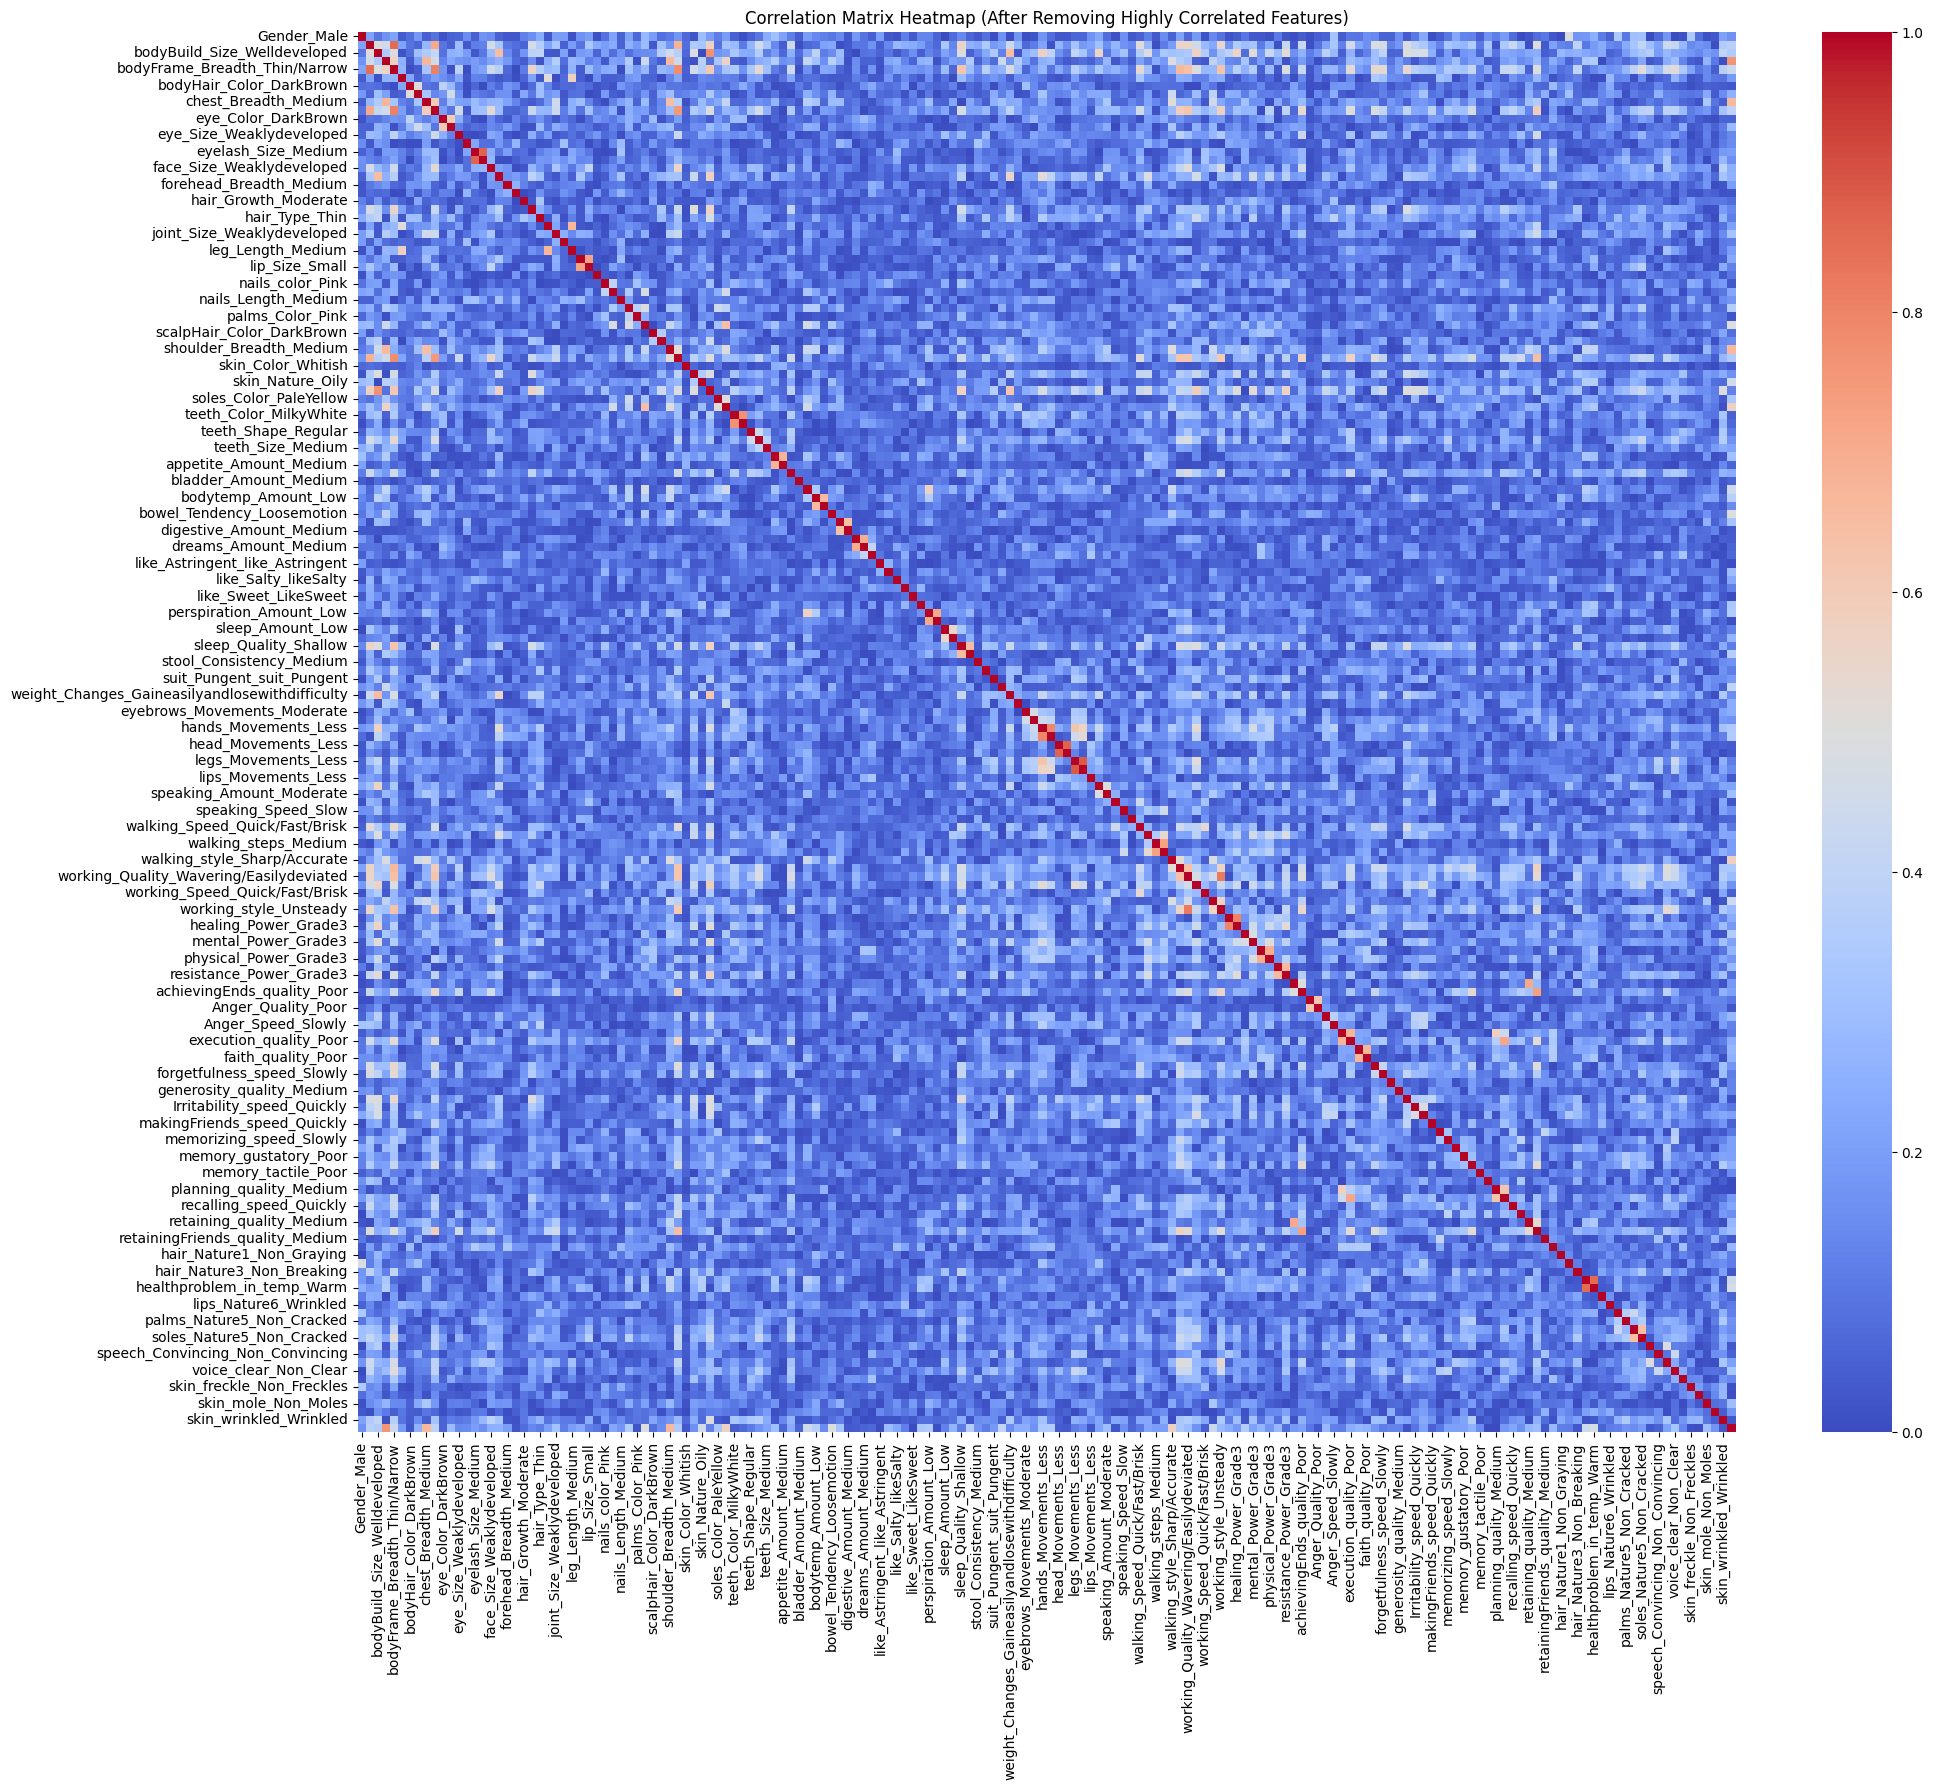

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the correlation matrix for the updated dataset
updated_correlation_matrix = X_no_corr.corr().abs()

# Plotting the heatmap for the updated correlation matrix
plt.figure(figsize=(21, 18))
sns.heatmap(
    updated_correlation_matrix,
    annot=False,  # Disable annotations to avoid clutter; set to True if the dataset is small
    cmap="coolwarm",  # Use a visually distinct colormap
    cbar=True
)
plt.title("Correlation Matrix Heatmap (After Removing Highly Correlated Features)")
plt.tight_layout()
plt.show()


In [9]:
# 4.4 Identifying Important Features with Random Forest

from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Training a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_no_corr, y)

# Extracting feature importances
feature_importances = rf_model.feature_importances_

# Creating a DataFrame of feature importances
important_features = pd.DataFrame({
    'Feature': X_no_corr.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Displaying the top 10 important features
print("Top 10 Important Features:")
print(important_features.head(10))


Top 10 Important Features:
                                     Feature  Importance
4              bodyFrame_Breadth_Thin/Narrow    0.118270
1             bodyBuild_Size_Weaklydeveloped    0.106105
39              shoulder_Breadth_Thin/Narrow    0.081353
9                  chest_Breadth_Thin/Narrow    0.059260
101                   walking_style_Unsteady    0.045491
43                            skin_Type_Thin    0.044880
74                     sleep_Quality_Shallow    0.038781
102  working_Quality_Wavering/Easilydeviated    0.036969
53                appetite_Frequency_Regular    0.026602
169                              class_Pitta    0.024378


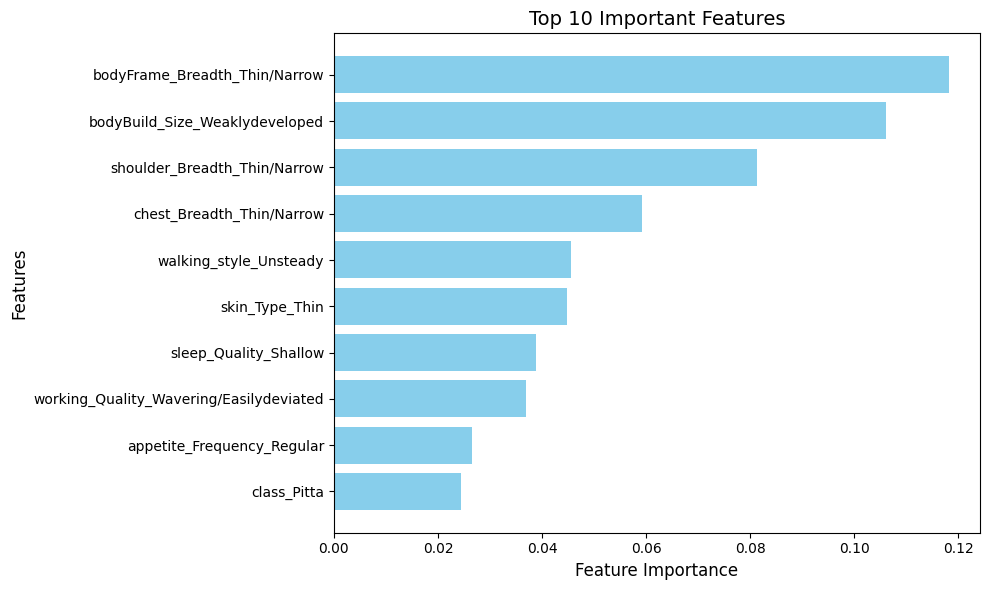

In [10]:
import matplotlib.pyplot as plt

# Extracting top 10 important features
top_10_important_features = important_features.head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_important_features['Feature'], top_10_important_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 10 Important Features', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()

# Save the plot as an image
plt.savefig("top_10_important_features.png")
plt.show()

Shape after PCA: (147, 10)


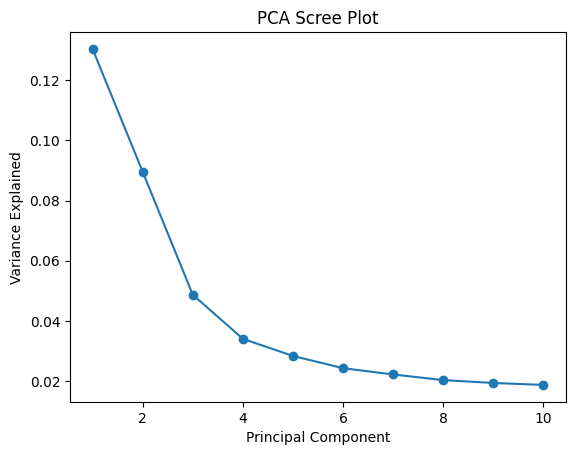

In [11]:
# PCA

from sklearn.impute import SimpleImputer

# Imputing missing values in the dataset
imputer = SimpleImputer(strategy='mean')
X_no_corr_imputed = imputer.fit_transform(X_no_corr)  # Replace missing values with column mean

from sklearn.decomposition import PCA

# Applying PCA to reduce dimensionality to 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_no_corr_imputed)

print(f"Shape after PCA: {X_pca.shape}")

import matplotlib.pyplot as plt

# Scree plot for explained variance
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title("PCA Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

In [12]:
import pandas as pd

# Extracting PCA components and explained variance ratios
pcs = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Mapping features to principal components
features = X_no_corr.columns
pc_feature_contributions = pd.DataFrame(pcs, columns=features)

# Adding explained variance ratio and component labels
pc_feature_contributions["Explained Variance Ratio"] = explained_variance_ratio
pc_feature_contributions["Principal Component"] = [f"PC{i+1}" for i in range(len(pcs))]
pc_feature_contributions.set_index("Principal Component", inplace=True)

# Displaying contributions of features to principal components
print("Principal Component Contributions and Explained Variance:")
print(pc_feature_contributions)

# Saving contributions to a CSV file
pc_feature_contributions.to_csv("pc_feature_contributions.csv")
print("Principal Component contributions saved to 'pc_feature_contributions.csv'")


Principal Component Contributions and Explained Variance:
                     Gender_Male  bodyBuild_Size_Weaklydeveloped  \
Principal Component                                                
PC1                    -0.056549                        0.187955   
PC2                     0.035874                       -0.038439   
PC3                     0.044977                       -0.072282   
PC4                    -0.152573                        0.004558   
PC5                     0.201678                        0.084977   
PC6                     0.248898                       -0.011183   
PC7                     0.040017                        0.039227   
PC8                     0.057758                        0.001738   
PC9                    -0.113849                       -0.028012   
PC10                   -0.052826                        0.023833   

                     bodyBuild_Size_Welldeveloped  bodyFrame_Breadth_Medium  \
Principal Component                           

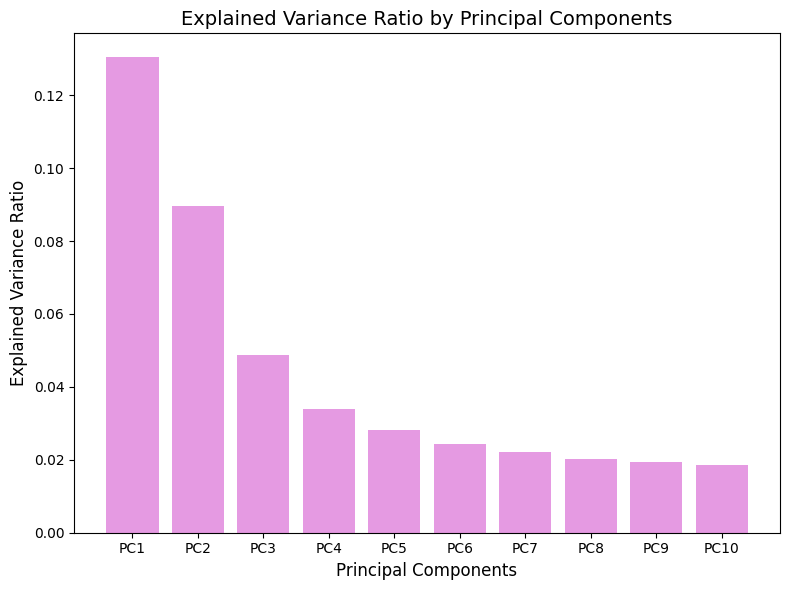

In [13]:
import matplotlib.pyplot as plt

# Assuming explained_variance_ratio is available as a list or array
explained_variance_ratio = pc_feature_contributions["Explained Variance Ratio"]

# Creating a bar plot for explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='orchid')
plt.xlabel("Principal Components", fontsize=12)
plt.ylabel("Explained Variance Ratio", fontsize=12)
plt.title("Explained Variance Ratio by Principal Components", fontsize=14)
plt.xticks(range(1, len(explained_variance_ratio) + 1), [f"PC{i}" for i in range(1, len(explained_variance_ratio) + 1)])
plt.tight_layout()

# Save the plot as an image
plt.savefig("explained_variance_ratio_by_pc.png")
plt.show()


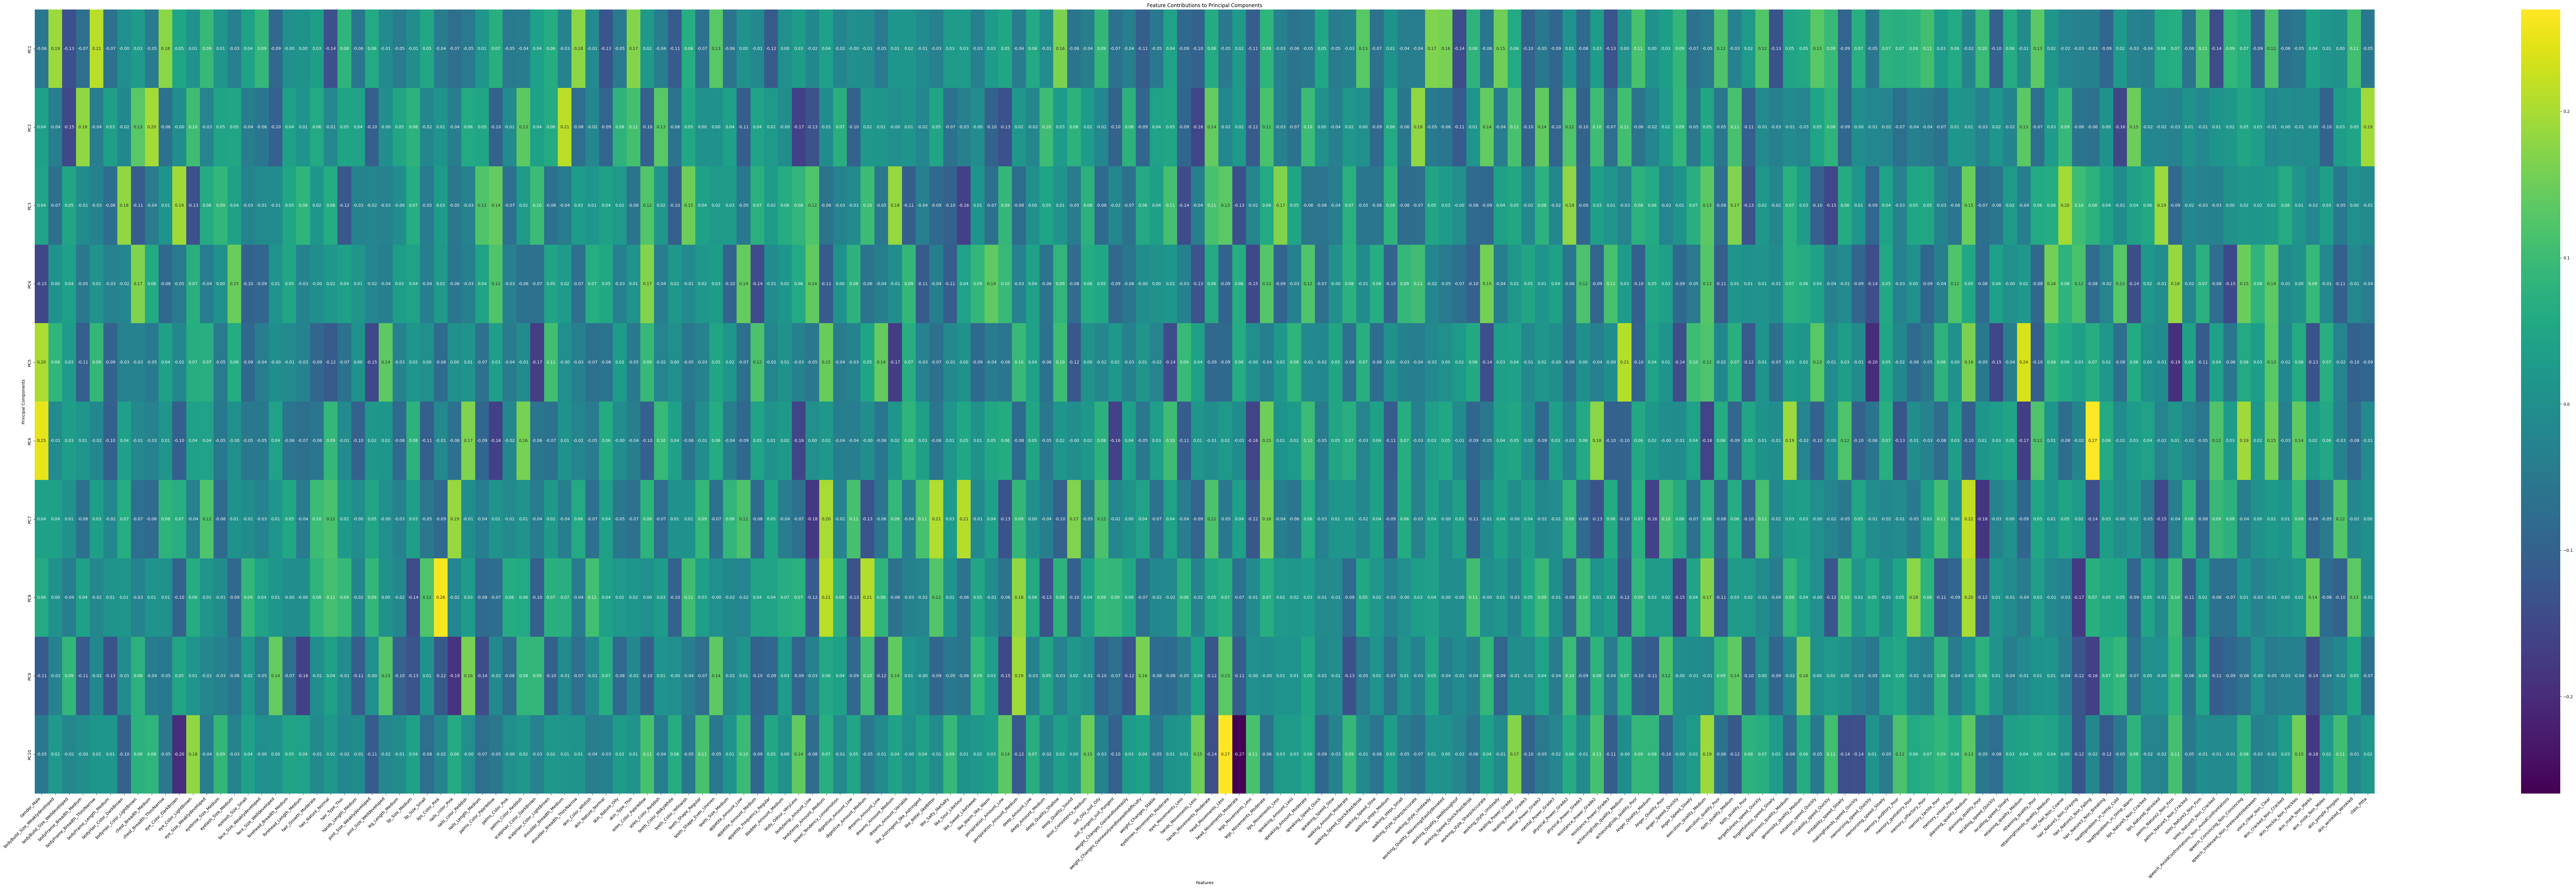

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV if necessary (assuming you saved it earlier)
pc_feature_contributions = pd.read_csv("pc_feature_contributions.csv", index_col="Principal Component")

# Drop the "Explained Variance Ratio" column for heatmap
contributions = pc_feature_contributions.drop(columns=["Explained Variance Ratio"])

# Plot heatmap of contributions
plt.figure(figsize=(100, 30))
sns.heatmap(contributions, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Feature Contributions to Principal Components")
plt.ylabel("Principal Components")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save the plot as an image
plt.savefig("pc_feature_contributions_heatmap.png")
plt.show()


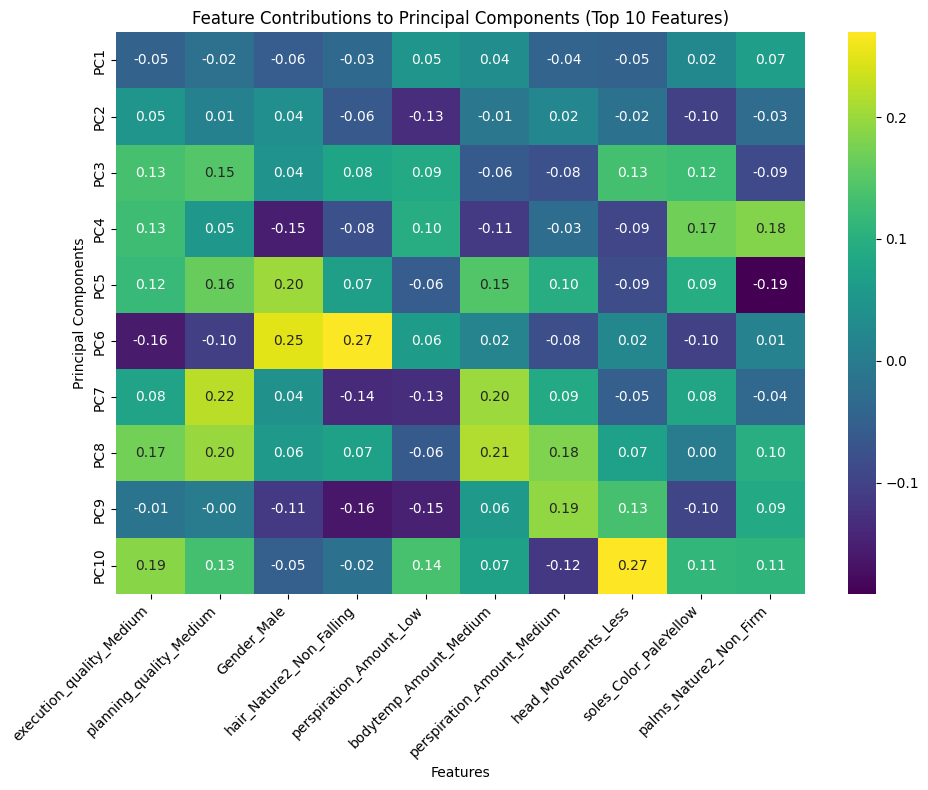

In [15]:
# Heatmap for top 10 features
# Step 3: Plot the heatmap for the selected features
top_10_features = contributions.abs().sum().nlargest(10).index
filtered_contributions = contributions[top_10_features]

plt.figure(figsize=(10, 8))

sns.heatmap(filtered_contributions, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Feature Contributions to Principal Components (Top 10 Features)")
plt.ylabel("Principal Components")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save the plot as an image
plt.savefig("top_10_feature_contributions_heatmap.png")
plt.show()


In [16]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (117, 10)
Testing set shape: (30, 10)


In [17]:
# Model Train and Evaluation with Training and Testing Accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 04 K-Nearest Neighbors (KNN)
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)

print("\nKNN Results:")
print(f"Training Accuracy: {accuracy_score(y_train, clf_knn.predict(X_train)):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))



KNN Results:
Training Accuracy: 0.9744
Testing Accuracy: 0.9333
Classification Report:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95        18
        True       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



In [18]:
# Verifying the results
# Cross-Validation

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)  # Replace `model` with your classifier
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")


Cross-validation scores: [1.         0.96666667 0.93103448 1.         0.93103448]
Mean accuracy: 0.9657471264367816


In [22]:
import joblib
from google.colab import files

# Save the trained KNN model
joblib.dump(clf_knn, "dosha_model.pkl")

# Download the model file to your local machine
files.download("dosha_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

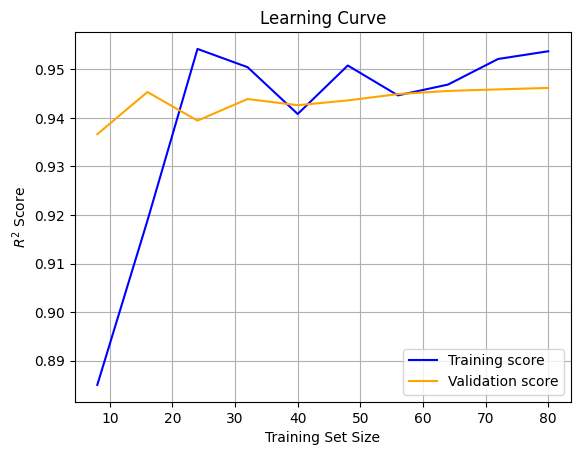

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Create a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Initialize the model
model = LinearRegression()

# Generate the learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2',
    cv=5,
    random_state=42
)

# Calculate mean and standard deviation of scores
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, validation_scores_mean, label='Validation score', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('$R^2$ Score')
plt.legend()
plt.grid()
plt.show()


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, r2_score # Import r2_score

# Define models in a dictionary
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
}

# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate R^2
    r2 = r2_score(y_test, y_pred)
    print(f"{name} R^2 Score: {r2:.4f}")



KNN R^2 Score: 0.7222


In [21]:
# Classes - Vata, Pitta and Kapha
import matplotlib.pyplot as plt

# Count rows for each class in the 'class' column
class_counts = data['class'].value_counts()

# Print counts for each class
print("Number of rows for each class:")
print(class_counts)


Number of rows for each class:
class
Vata     66
Kapha    46
Pitta    35
Name: count, dtype: int64
